In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import statsmodels.api as sm
import scipy
plt.rc('axes', unicode_minus=False)

In [91]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [92]:
df_pre = pd.read_csv("pre_operation.csv")
df_click = pd.read_csv("click_data.csv")
df_weather = pd.read_csv("weather.csv")

In [93]:
df_pre.head()

,target_dates,op_rate_0d_all_cars,op_rate_1d_all_cars,op_rate_2d_all_cars,op_rate_3d_all_cars,op_rate_4d_all_cars,op_rate_5d_all_cars,op_rate_6d_all_cars,op_rate_7d_all_cars,op_rate_0d_major_cars,op_rate_1d_major_cars,op_rate_2d_major_cars,op_rate_3d_major_cars,op_rate_4d_major_cars,op_rate_5d_major_cars,op_rate_6d_major_cars,op_rate_7d_major_cars
0,2019-11-20,0.316167,0.128829,0.073450,0.047983,0.041501,0.035837,0.028633,0.023602,0.354157,0.133284,0.078416,0.051335,0.043031,0.037124,0.030191,0.024724
1,2019-04-07,0.433710,0.165792,0.114138,0.091261,0.073171,0.060375,0.048367,0.040212,0.477168,0.162459,0.116169,0.092505,0.075456,0.062375,0.051132,0.040773
2,2020-09-20,0.470135,0.252650,0.181241,0.142521,0.117679,0.095518,0.076442,0.059885,0.469391,0.259594,0.186417,0.146953,0.120212,0.098140,0.078305,0.060749
3,2019-11-28,0.320862,0.132336,0.075752,0.052990,0.038522,0.033602,0.029606,0.025020,0.358306,0.140434,0.082168,0.057721,0.041842,0.036485,0.030878,0.027118
4,2021-06-26,0.444924,0.233424,0.174414,0.144886,0.123617,0.102621,0.086654,0.077878,0.426241,0.230812,0.167328,0.136924,0.114490,0.092528,0.078320,0.070913


In [94]:
df_click.head(15)

,target_dates,click_d_day,click_d_1,click_d_2,click_d_3,click_d_4,click_d_5,click_d_6,click_d_7
0,2019-01-23,0,0,0,0,0,0,0,0
1,2019-07-24,0,0,0,0,0,0,0,0
2,2019-08-21,0,0,0,0,0,0,0,0
3,2019-08-24,0,0,0,0,0,0,0,0
4,2019-08-25,0,0,0,0,0,0,0,0
5,2019-08-26,0,0,0,0,0,0,0,0
6,2019-08-29,0,0,0,0,0,0,0,0
7,2019-08-31,33,0,0,0,0,0,0,0
8,2019-09-01,265846,0,0,0,0,0,0,0
9,2019-09-02,218807,6761,0,0,0,0,0,0


In [95]:
df_weather.head()

,date,is_clean,avg_precipitation,avg_temperature
0,2018-01-01,1,0.0,0.2
1,2018-01-02,1,0.0,0.2
2,2018-01-03,0,0.4,-1.3
3,2018-01-04,0,0.7,-1.9
4,2018-01-05,0,2.4,-0.3


In [96]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_dates           939 non-null    object 
 1   op_rate_0d_all_cars    939 non-null    float64
 2   op_rate_1d_all_cars    939 non-null    float64
 3   op_rate_2d_all_cars    939 non-null    float64
 4   op_rate_3d_all_cars    939 non-null    float64
 5   op_rate_4d_all_cars    939 non-null    float64
 6   op_rate_5d_all_cars    939 non-null    float64
 7   op_rate_6d_all_cars    939 non-null    float64
 8   op_rate_7d_all_cars    939 non-null    float64
 9   op_rate_0d_major_cars  939 non-null    float64
 10  op_rate_1d_major_cars  939 non-null    float64
 11  op_rate_2d_major_cars  939 non-null    float64
 12  op_rate_3d_major_cars  939 non-null    float64
 13  op_rate_4d_major_cars  939 non-null    float64
 14  op_rate_5d_major_cars  939 non-null    float64
 15  op_rat

In [97]:
df_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   target_dates  793 non-null    object
 1   click_d_day   793 non-null    int64 
 2   click_d_1     793 non-null    int64 
 3   click_d_2     793 non-null    int64 
 4   click_d_3     793 non-null    int64 
 5   click_d_4     793 non-null    int64 
 6   click_d_5     793 non-null    int64 
 7   click_d_6     793 non-null    int64 
 8   click_d_7     793 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 55.9+ KB


In [98]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1232 non-null   object 
 1   is_clean           1232 non-null   int64  
 2   avg_precipitation  1232 non-null   float64
 3   avg_temperature    1213 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 38.6+ KB


In [99]:
df_pre['target_dates'] = pd.to_datetime(df_pre['target_dates'])
df_click['target_dates'] = pd.to_datetime(df_click['target_dates'], format='%Y-%m-%d')
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%Y-%m-%d')

In [100]:
# set를 이용한 결측치 확인 방법
set(pd.date_range(min(df_pre.target_dates), max(df_pre.target_dates))).difference(set(df_pre.target_dates))

set()

In [101]:
# 생성한 날짜 범위 내에서 누락된 날짜들을 찾음, 즉 date_range로 날짜 범위는 있지만 데이터프레임 안에서는 존재하지않는 날짜를 출력해줌.
set(pd.date_range(min(df_click.target_dates), max(df_click.target_dates))).difference(set(df_click.target_dates)) # 차집합

{Timestamp('2019-01-24 00:00:00'),
 Timestamp('2019-01-25 00:00:00'),
 Timestamp('2019-01-26 00:00:00'),
 Timestamp('2019-01-27 00:00:00'),
 Timestamp('2019-01-28 00:00:00'),
 Timestamp('2019-01-29 00:00:00'),
 Timestamp('2019-01-30 00:00:00'),
 Timestamp('2019-01-31 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-02-02 00:00:00'),
 Timestamp('2019-02-03 00:00:00'),
 Timestamp('2019-02-04 00:00:00'),
 Timestamp('2019-02-05 00:00:00'),
 Timestamp('2019-02-06 00:00:00'),
 Timestamp('2019-02-07 00:00:00'),
 Timestamp('2019-02-08 00:00:00'),
 Timestamp('2019-02-09 00:00:00'),
 Timestamp('2019-02-10 00:00:00'),
 Timestamp('2019-02-11 00:00:00'),
 Timestamp('2019-02-12 00:00:00'),
 Timestamp('2019-02-13 00:00:00'),
 Timestamp('2019-02-14 00:00:00'),
 Timestamp('2019-02-15 00:00:00'),
 Timestamp('2019-02-16 00:00:00'),
 Timestamp('2019-02-17 00:00:00'),
 Timestamp('2019-02-18 00:00:00'),
 Timestamp('2019-02-19 00:00:00'),
 Timestamp('2019-02-20 00:00:00'),
 Timestamp('2019-02-

In [102]:
print(df_click[df_click.target_dates<'2019-08-30'])

  target_dates  click_d_day  click_d_1  click_d_2  click_d_3  click_d_4  \
0   2019-01-23            0          0          0          0          0   
1   2019-07-24            0          0          0          0          0   
2   2019-08-21            0          0          0          0          0   
3   2019-08-24            0          0          0          0          0   
4   2019-08-25            0          0          0          0          0   
5   2019-08-26            0          0          0          0          0   
6   2019-08-29            0          0          0          0          0   

   click_d_5  click_d_6  click_d_7  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          0  
4          0          0          0  
5          0          0          0  
6          0          0          0  


In [103]:
df_click.drop(df_click[df_click.target_dates<'2019-08-30'].index, inplace=True) # .index는 조건에 해당하는 행들의 인덱스를 선택하는 것
set(pd.date_range(min(df_click.target_dates), max(df_click.target_dates))).difference(set(df_click.target_dates))

set()

In [104]:
set(pd.date_range(min(df_weather.date), max(df_weather.date))).difference(set(df_weather.date))

{Timestamp('2020-12-08 00:00:00'),
 Timestamp('2021-01-10 00:00:00'),
 Timestamp('2021-02-04 00:00:00'),
 Timestamp('2021-03-12 00:00:00'),
 Timestamp('2021-03-17 00:00:00'),
 Timestamp('2021-03-25 00:00:00')}

In [105]:
date = pd.date_range(min(df_weather.date), max(df_weather.date)).difference(df_weather.date)
date

DatetimeIndex(['2020-12-08', '2021-01-10', '2021-02-04', '2021-03-12',
               '2021-03-17', '2021-03-25'],
              dtype='datetime64[ns]', freq=None)

In [106]:
# df_weather = df_weather.append(
#     pd.DataFrame({
#         'date': date,
#         'is_clean': [1]*6,
#         'avg_precipitation': [0]*6
#     })
# )
new_data = pd.DataFrame({
    'date': date,
    'is_clean': [1]*6,
    'avg_precipitation': [0]*6
})
df_weather = pd.concat([df_weather, new_data])

In [107]:
df_weather[df_weather['avg_temperature'].isnull()]

,date,is_clean,avg_precipitation,avg_temperature
1006,2020-10-03,0,24.0,NaN
1033,2020-10-30,0,0.1,NaN
1064,2020-11-30,1,0.0,NaN
1078,2020-12-15,1,0.0,NaN
1093,2020-12-30,0,15.5,NaN
1107,2021-01-14,1,0.0,NaN
1113,2021-01-20,1,0.0,NaN
1114,2021-01-21,1,0.0,NaN
1140,2021-02-17,1,0.0,NaN
1162,2021-03-11,1,0.0,NaN


In [108]:
# 3월 결측치가 가장 많기 때문에, 3월만 모아보기
df_weather["month"] = df_weather['date'].dt.month
df_weather["year"] = df_weather['date'].dt.year
df_weather[(df_weather['month']==3) & (df_weather['year']==2021)]

,date,is_clean,avg_precipitation,avg_temperature,month,year
1152,2021-03-01,0,499.1,7.6,3,2021
1153,2021-03-02,0,27.4,2.9,3,2021
1154,2021-03-03,1,0.0,4.1,3,2021
1155,2021-03-04,0,58.0,6.6,3,2021
1156,2021-03-05,0,1.3,8.9,3,2021
1157,2021-03-06,0,3.2,6.5,3,2021
1158,2021-03-07,0,0.2,6.0,3,2021
1159,2021-03-08,0,0.0,6.4,3,2021
1160,2021-03-09,1,0.0,7.3,3,2021
1161,2021-03-10,1,0.0,8.2,3,2021


In [109]:
# 선형 보간법
df_weather.interpolate(method='linear', inplace=True)

In [112]:
df_weather['avg_temperature'] = df_weather['avg_temperature'].apply(lambda x: f'{x: .1f}')

In [113]:
df_weather[(df_weather['month']==3) & (df_weather['year']==2021)]

,date,is_clean,avg_precipitation,avg_temperature,month,year
1152,2021-03-01,0,499.1,7.6,3,2021
1153,2021-03-02,0,27.4,2.9,3,2021
1154,2021-03-03,1,0.0,4.1,3,2021
1155,2021-03-04,0,58.0,6.6,3,2021
1156,2021-03-05,0,1.3,8.9,3,2021
1157,2021-03-06,0,3.2,6.5,3,2021
1158,2021-03-07,0,0.2,6.0,3,2021
1159,2021-03-08,0,0.0,6.4,3,2021
1160,2021-03-09,1,0.0,7.3,3,2021
1161,2021-03-10,1,0.0,8.2,3,2021


In [114]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 5
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1238 non-null   datetime64[ns]
 1   is_clean           1238 non-null   int64         
 2   avg_precipitation  1238 non-null   float64       
 3   avg_temperature    1238 non-null   object        
 4   month              1238 non-null   int32         
 5   year               1238 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 58.0+ KB


In [115]:
# f스트링을 이용해 소숫점 1자리까지 표시하게 해서 문자열로 변경됨 다시 소수형으로 바꿔주어야 함
df_weather['avg_temperature'] = df_weather['avg_temperature'].astype(float)

In [116]:
df_click.describe()

,target_dates,click_d_day,click_d_1,click_d_2,click_d_3,click_d_4,click_d_5,click_d_6,click_d_7
count,786,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,2020-09-26 12:00:00,201494.580153,17160.034351,9602.793893,6807.349873,5187.122137,3857.615776,2787.436387,2089.165394
min,2019-08-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-03-14 06:00:00,181910.500000,13173.500000,6208.250000,3982.000000,2891.500000,2260.500000,1785.000000,1320.750000
50%,2020-09-26 12:00:00,203786.000000,16172.000000,9048.500000,6058.500000,4430.500000,3263.000000,2508.500000,1854.000000
75%,2021-04-10 18:00:00,250508.500000,20525.500000,11887.750000,8820.750000,6532.750000,4850.750000,3697.000000,2740.750000
max,2021-10-24 00:00:00,520792.000000,48827.000000,36055.000000,26235.000000,19498.000000,14097.000000,10953.000000,10116.000000
std,NaN,88268.278525,9408.155347,5906.865439,4641.938108,3786.527637,2739.971032,1722.587157,1372.274766


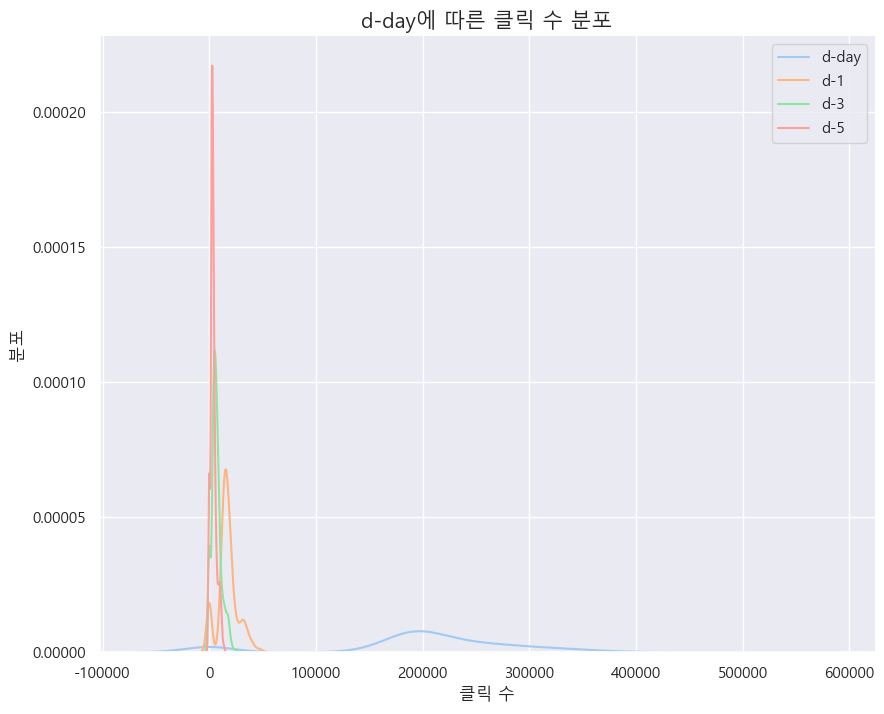

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

sns.kdeplot(df_click['click_d_day'])
sns.kdeplot(df_click[ 'click_d_1' ])
sns.kdeplot(df_click[ 'click_d_3' ])
sns.kdeplot(df_click[ 'click_d_5' ])

plt.legend(['d-day', 'd-1', 'd-3', 'd-5'])
plt.xlabel('클릭 수')
plt.ylabel('분포')
plt.title('d-day에 따른 클릭 수 분포', fontsize=15)
plt.show()

위의 시각화를 통해 미리 예약이 아닌, 이용당일에 예약하는 패턴을 알수있음

In [118]:
df_weather.describe()

,date,is_clean,avg_precipitation,avg_temperature,month,year
count,1238,1238.000000,1238.000000,1238.000000,1238.000000,1238.00000
mean,2019-09-11 12:00:00,0.226979,39.128110,12.927383,6.105008,2019.23021
min,2018-01-01 00:00:00,0.000000,0.000000,-11.300000,1.000000,2018.00000
25%,2018-11-06 06:00:00,0.000000,0.000000,5.600000,3.000000,2018.00000
50%,2019-09-11 12:00:00,0.000000,1.400000,13.000000,6.000000,2019.00000
75%,2020-07-16 18:00:00,0.000000,19.300000,21.000000,9.000000,2020.00000
max,2021-05-22 00:00:00,1.000000,1024.200000,30.500000,12.000000,2021.00000
std,NaN,0.419048,101.688929,9.180719,3.478348,0.99854


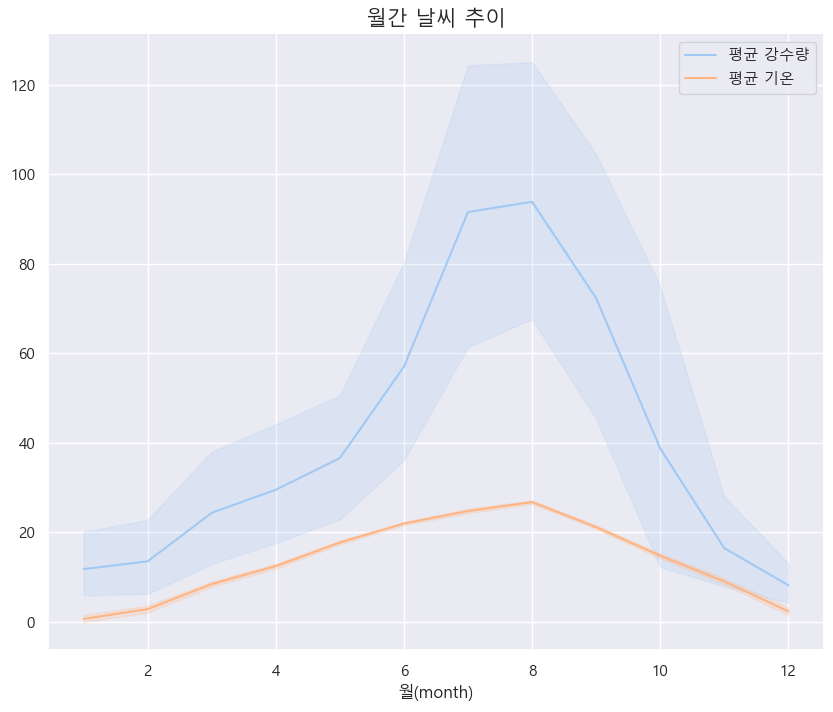

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

sns.lineplot(
    data=df_weather,
    x='month',
    y='avg_precipitation',
    label='평균 강수량',
)

sns.lineplot(
    data=df_weather,
    x='month',
    y='avg_temperature',
    label='평균 기온'
)

plt.title('월간 날씨 추이', fontsize=15)
plt.xlabel('월(month)')
plt.ylabel('')
plt.show()

- 선 주위의 바탕은 신뢰구간을 나타냄.
- 신뢰구간이란 해당 점에서의 데이터 분포가 얼마나 변동하는지를 나타냄.
- 신뢰구간이 넓을 수록 해당 추정치의 신뢰도가 낮음

In [120]:
df_pre.describe()

,target_dates,op_rate_0d_all_cars,op_rate_1d_all_cars,op_rate_2d_all_cars,op_rate_3d_all_cars,op_rate_4d_all_cars,op_rate_5d_all_cars,op_rate_6d_all_cars,op_rate_7d_all_cars,op_rate_0d_major_cars,op_rate_1d_major_cars,op_rate_2d_major_cars,op_rate_3d_major_cars,op_rate_4d_major_cars,op_rate_5d_major_cars,op_rate_6d_major_cars,op_rate_7d_major_cars
count,939,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,2020-04-14 00:00:00.000000256,0.361281,0.164213,0.109605,0.085625,0.070207,0.058915,0.050080,0.043168,0.373451,0.167041,0.109600,0.084464,0.068381,0.056761,0.047681,0.040624
min,2019-01-01 00:00:00,0.174715,0.039806,0.022272,0.017061,0.013667,0.011317,0.009533,0.007679,0.204501,0.041068,0.022316,0.015664,0.012037,0.009645,0.008158,0.005082
25%,2019-08-23 12:00:00,0.315339,0.132602,0.079317,0.058178,0.045959,0.037512,0.030810,0.025605,0.323614,0.134492,0.080738,0.058374,0.045451,0.036878,0.029958,0.024426
50%,2020-04-14 00:00:00,0.348765,0.162627,0.105795,0.081850,0.066181,0.054196,0.045335,0.038329,0.360241,0.165459,0.105375,0.080374,0.063985,0.052684,0.043206,0.036351
75%,2020-12-04 12:00:00,0.410756,0.190794,0.132588,0.106823,0.087609,0.073784,0.063248,0.055452,0.421790,0.194873,0.131121,0.104106,0.085665,0.071535,0.060833,0.052804
max,2021-07-27 00:00:00,0.718287,0.414606,0.359010,0.307167,0.272030,0.240116,0.209599,0.191690,0.726530,0.434607,0.360164,0.301955,0.259645,0.219954,0.194307,0.172045
std,NaN,0.079082,0.052017,0.043476,0.037537,0.033096,0.029325,0.026288,0.024137,0.075612,0.052242,0.042528,0.036145,0.031512,0.027645,0.024564,0.022477


In [121]:
df_pre_v1 = df_pre[['target_dates', 'op_rate_0d_all_cars', 'op_rate_1d_all_cars', 'op_rate_2d_all_cars', 'op_rate_3d_all_cars', 'op_rate_4d_all_cars', 'op_rate_5d_all_cars', 'op_rate_6d_all_cars', 'op_rate_7d_all_cars']]

df_pre_v1 = df_pre_v1.melt(
    id_vars='target_dates', # 구분할 칼럼
    value_vars=['op_rate_0d_all_cars', 'op_rate_1d_all_cars', 'op_rate_2d_all_cars', 'op_rate_3d_all_cars', 'op_rate_4d_all_cars', 'op_rate_5d_all_cars', 'op_rate_6d_all_cars', 'op_rate_7d_all_cars'], # 열로 옮길 칼럼들
    var_name='d-day', # 새로운 칼럼의 이름
    value_name='op_value', # 기존 칼럼들의 행값들이 들어갈 칼럼의 이름
)\
.replace('op_rate_0d_all_cars', 0)\
.replace('op_rate_1d_all_cars', 1)\
.replace('op_rate_2d_all_cars', 2)\
.replace('op_rate_3d_all_cars', 3)\
.replace('op_rate_4d_all_cars', 4)\
.replace('op_rate_5d_all_cars', 5)\
.replace('op_rate_6d_all_cars', 6)\
.replace('op_rate_7d_all_cars', 7)

df_pre_v1.head()

,target_dates,d-day,op_value
0,2019-11-20,0,0.316167
1,2019-04-07,0,0.433710
2,2020-09-20,0,0.470135
3,2019-11-28,0,0.320862
4,2021-06-26,0,0.444924


- melt 는 데이터프레임의 열을 행으로 '녹여내는' 작업을 수행함
- 각 칼럼이 관측치의 속성을 담고 있는 '넓은'데이터의 이러한 열을 행으로 변환하여 관측치를 여러 행으로 분리시켜 '긴'데이터로 만듦
- 더 효과적으로 분석하거나, 시각화에 도움을 줌